# Jedha Project speed dating

#### Our purpose is to understand love trough this dataset and which criterias are important to date a second date

# Import librairies and data

In [70]:
import pandas as pd
import numpy as npµ
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('Speed Dating Data.csv', encoding= "ISO-8859-1")

In [101]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


# Data Cleaning

In [102]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [103]:
df.shape

(8378, 195)

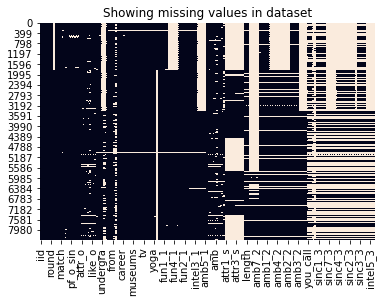

In [104]:
sns.heatmap(df.isna(), cbar=False)

plt.title('Showing missing values in dataset')
plt.show()

In [105]:
missing = df.isna().mean() * 100
mask = missing < 10
mask.value_counts()

False    108
True      87
dtype: int64

Cleaning the dataset and remove columns with more than 10% of missing values

In [109]:
df_clean=df[df.columns[mask]]
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,decision,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,0,1,1,1,10,7,4,1,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,0,1,1,1,10,7,3,2,...,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,0,1,1,1,10,7,10,3,...,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,0,1,1,1,10,7,5,4,...,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,0,1,1,1,10,7,7,5,...,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


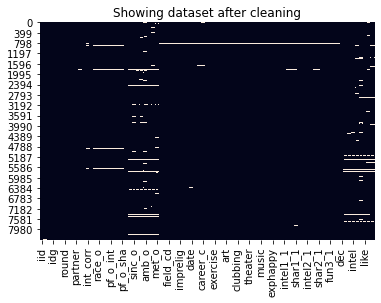

In [92]:
sns.heatmap(df_clean.isna(), cbar=False)
plt.title('Showing dataset after cleaning')
plt.show()

In [108]:
df = df.rename(columns={'dec_o':'decision_partner'})
df = df.rename(columns={'dec':'decision'})

In [80]:
df['samerace'].replace((0,1), ('No','Yes'), inplace = True)

In [97]:
df['decision_partner'].replace((0,1), ('No','Yes'), inplace = True)
df['decision'].replace((0,1), ('No','Yes'), inplace = True)

In [111]:
df['field_cd'] = df['field_cd'].apply(lambda x : 'Law' if x==1 
else 'Math' if x==2
else 'Social Science, Psychologist' if x==3
else 'Medical Science, Pharmaceuticals, Bio Tech' if x==4
else 'Engineering' if x==5
else 'English,Creative Writing, Journalism' if x==6
else 'History/Religion/Philosophy' if x==7
else 'Business/Econ/Finance' if x==8
else 'Education, Academia' if x==9
else 'Biological Sciences/Chemistry/Physics' if x==10
else 'Social Work' if x==11
else 'Undergrad/undecided ' if x==12
else 'Political Science/International Affairs' if x==13
else 'Film' if x==14
else 'Fine Arts/Arts Administration' if x==15
else 'Languages' if x==16
else 'Architecture' if x==17
else 'Other'
 )

In [26]:
df.loc[df.goal == 1,['goal']] ='Seems like a fun night out'
df.loc[df.goal == 2,['goal']] ='To meet new people'
df.loc[df.goal == 3,['goal']] ='To get a date'
df.loc[df.goal == 4,['goal']] ='Looking for a serious relationship'
df.loc[df.goal == 5,['goal']] ='To say I did it'
df.loc[df.goal == 6,['goal']] ='Other'

In [27]:
df['date_3'].isna().sum()

4404

**date_3 tell us if a participant get a second date can't be used because of a lot of missing values. We will concentrate on column match**

In [28]:
df_clean.shape

(8378, 87)

In [29]:
df3=df_clean.drop_duplicates(subset='iid')

Getting a dataset with only one row per participant for exploratory characteristics

In [31]:
df3.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,0,1,1,1,10,7,4,1,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
10,2,2.0,0,3,1,1,10,3,10,1,...,3.0,0,5.0,7.0,8.0,4.0,6.0,6.0,4.0,2.0
20,3,3.0,0,5,1,1,10,9,6,1,...,8.0,0,7.0,9.0,10.0,7.0,8.0,8.0,7.0,1.0
30,4,4.0,0,7,1,1,10,6,3,1,...,8.0,0,4.0,10.0,8.0,5.0,8.0,6.0,7.0,2.0
40,5,5.0,0,9,1,1,10,4,1,1,...,8.0,0,5.0,8.0,8.0,2.0,2.0,7.0,5.0,2.0


### Exploratoring the dataset

In [63]:
df3['gender'].replace((0,1), ('Female','Male'), inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


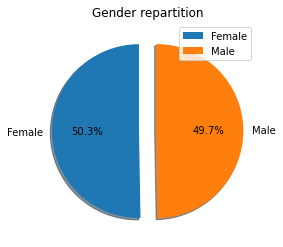

In [64]:
labels = df3['gender'].unique()
sizes = df3['gender'].value_counts()
explode=(0.1,0.1)
plt.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
plt.legend(df['gender'].unique())
plt.title('Gender repartition')
plt.show()

In [138]:
df['match'].mean()

0.16471711625686322

There is 16.7% of match from all participants

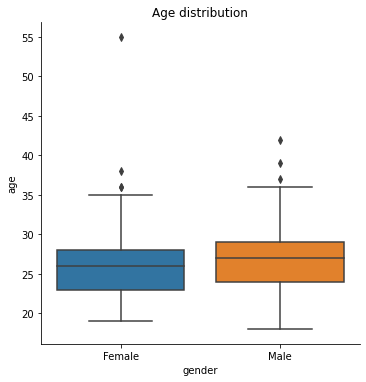

In [65]:
sns.catplot(x='gender', y='age', data=df3, kind='box')
plt.title('Age distribution')
plt.show()

Participants seems to be young around 26 for women and 27 fo men

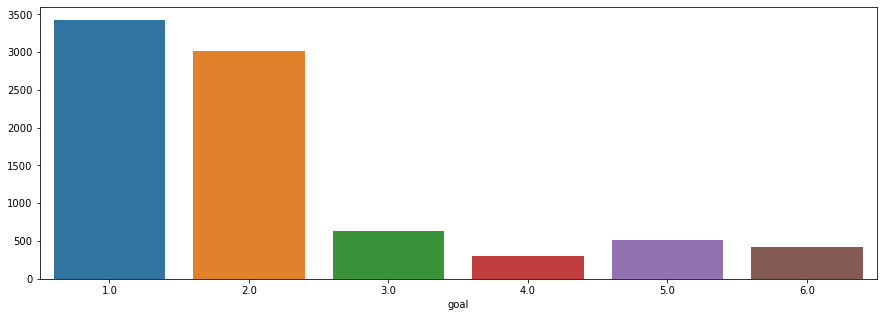

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(x='goal', data=df)
plt.ylabel('')
plt.show()

Getting a date or a serious relationship are not participants first objectif

## What may influence participants choice

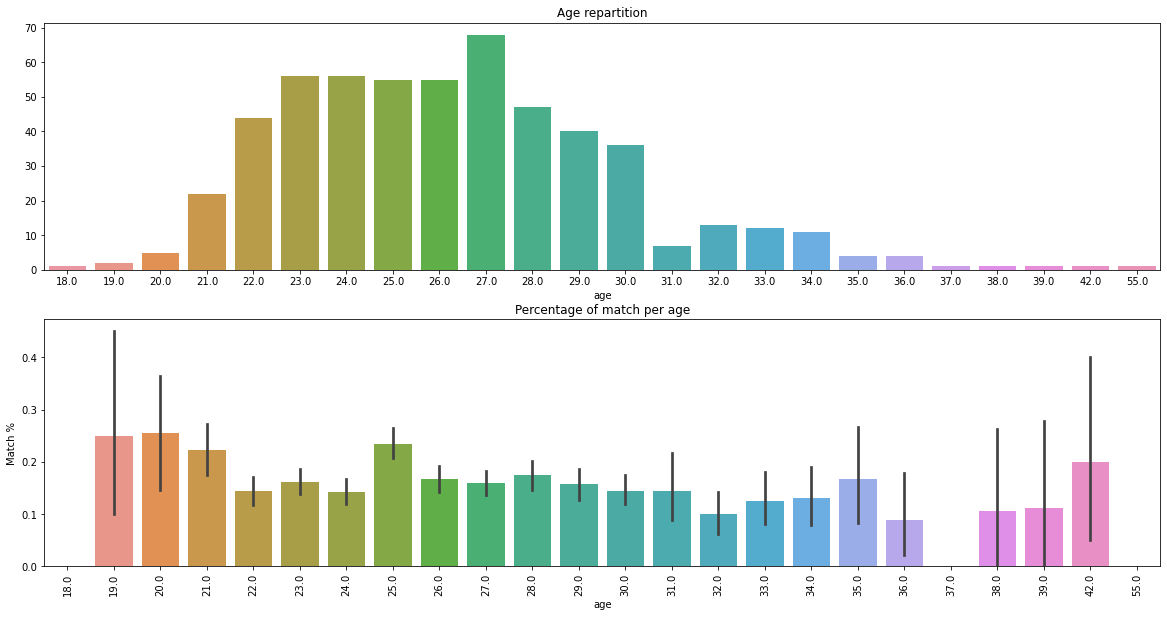

In [67]:
plt.figure(figsize=(20,10))

# First chart
plt.subplot(211)
plt.title('Age repartition')
sns.countplot(x='age', data=df3)
plt.ylabel('')

# Second chart
plt.subplot(212)
sns.barplot(x='age', y='match', data=df_clean)
plt.title('Percentage of match per age')
plt.xticks(rotation=90)
plt.ylabel('Match %')
plt.show()

Young people seems to get more match especialy young one.
It looks like people of same age match together if they are not many

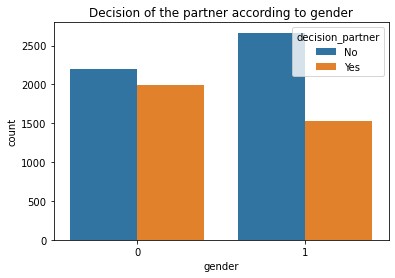

In [83]:
sns.countplot(hue='decision_partner', x='gender', data=df_clean)
plt.title('Decision of the partner according to gender')
plt.show()

men seem to be rejected more frequently by women than whereas it is the opposite for women

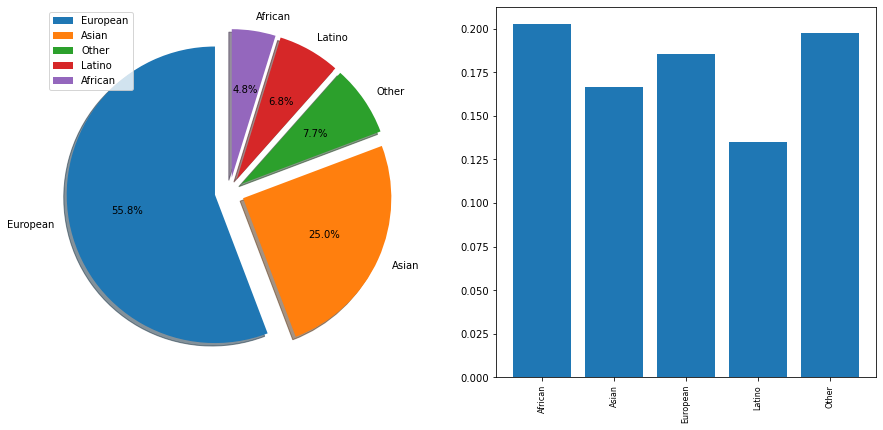

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(222)
labels = 'African', 'Asian', 'European', 'Latino', 'Other' 
sizes = df.groupby(by="race").mean()['match']
plt.bar(labels, sizes)
plt.xticks(size=8,rotation=90)
plt.subplot(221)
labels = 'European', 'Asian', 'Other', 'Latino', 'African'
sizes = df3['race'].value_counts()
explode=(0.1,0.1,0.1,0.1,0.1)
plt.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.xticks(size=8,rotation=45)
plt.legend(labels)
plt.show()

Participants are mostly european. The mean of match per race doesn't give us a lot of intels.

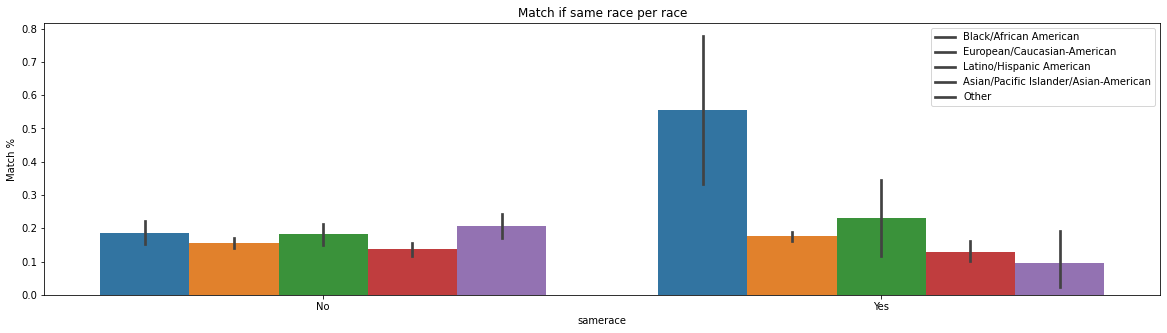

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(y='match', x='samerace', hue='race', data=df)
plt.title('Match if same race per race')
plt.ylabel('Match %')
plt.legend(['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian/Pacific Islander/Asian-American', 'Other'])
plt.show()

Fact that two participants have same race seem to be very important for Black/African American

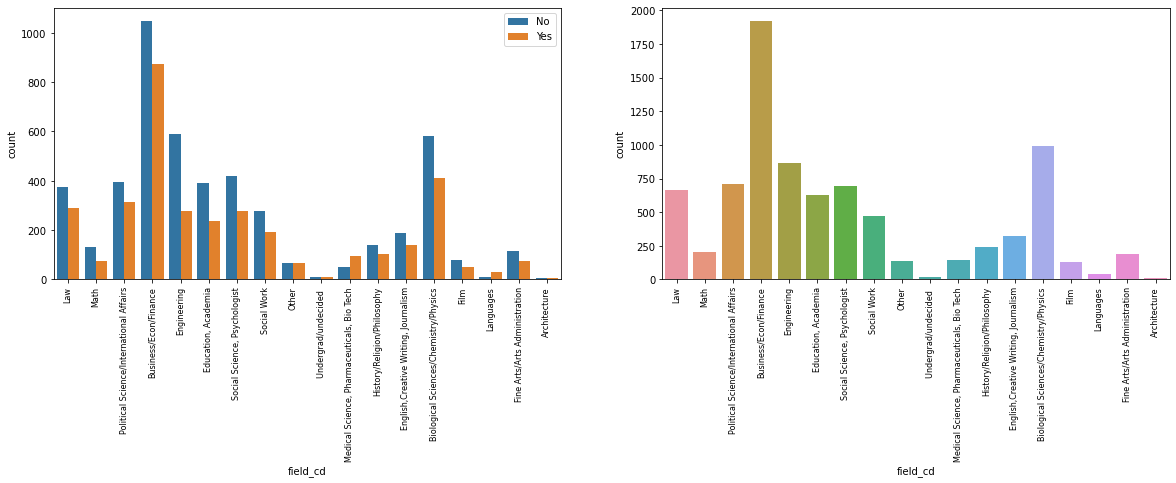

In [118]:
plt.figure(figsize=(20,5))

# First chart
plt.subplot(121)
sns.countplot(hue='decision_partner', x='field_cd', data=df)
plt.xticks(size=8,rotation=90)
plt.legend(['No', 'Yes'])

# Second chart
plt.subplot(122)
sns.countplot(x='field_cd', data=df)
plt.xticks(size=8,rotation=90)

plt.show()

It looks like only working inMedical Science, Pharmaceuticals or Bio Tech can get you a better chance getting yes than no from your partner. Engineer doesn't seem to be a good job to match.

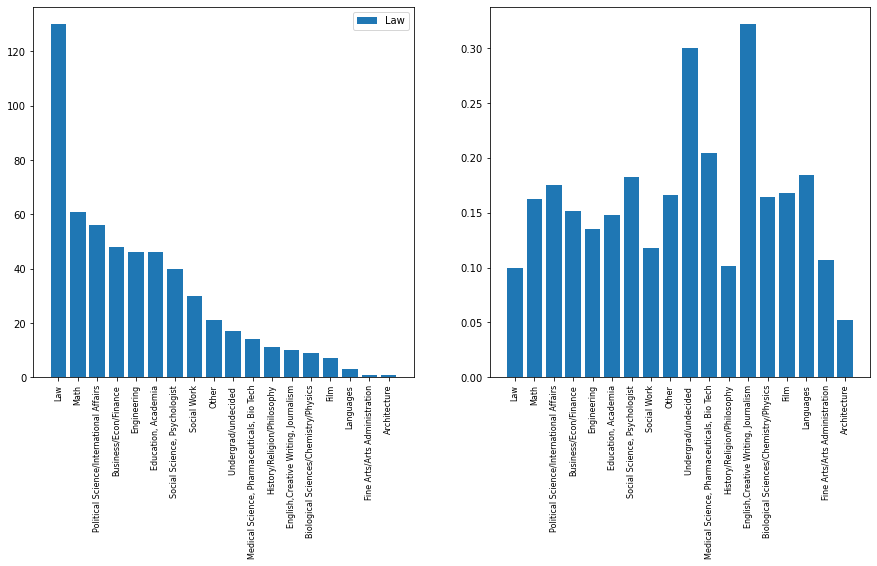

In [191]:
labels = df['field_cd'].unique()
sizes = df.groupby(by="field_cd").mean()['match']
plt.figure(figsize=(15,15))
plt.subplot(222)
plt.bar(labels, sizes)
plt.xticks(size=8,rotation=90)
plt.subplot(221)
plt.bar(labels, df3['field_cd'].value_counts())
plt.xticks(size=8,rotation=90)
plt.legend(labels)
plt.show()

In [152]:
hommes=df3[df3['gender']=='Male']
femmes=df3[df3['gender']=='Female']

In [65]:
b = ['attr1_1','sinc1_1','intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

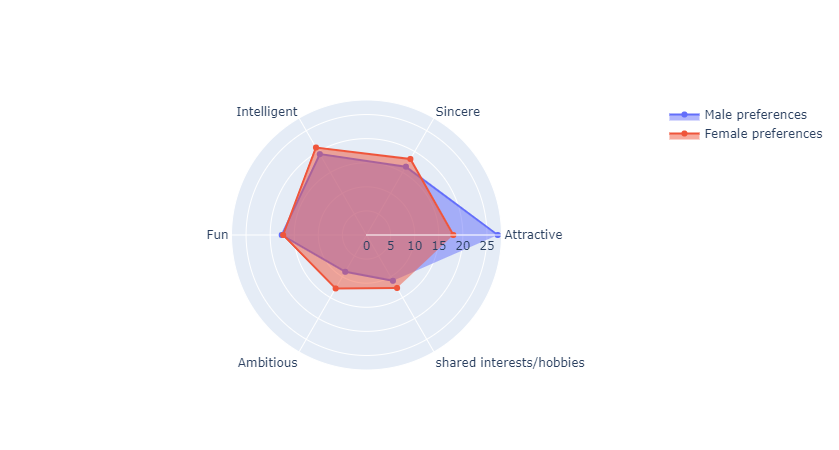

In [202]:
import plotly.graph_objects as go

b = ['attr1_1','sinc1_1','intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
theta=['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious', 'shared interests/hobbies']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[b].mean(),
    theta=theta,
    fill='toself',
    name='Male preferences'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[b].mean(),
    theta=theta,
    fill='toself',
    name='Female preferences'
))

fig.show()

Male prefer attractive women

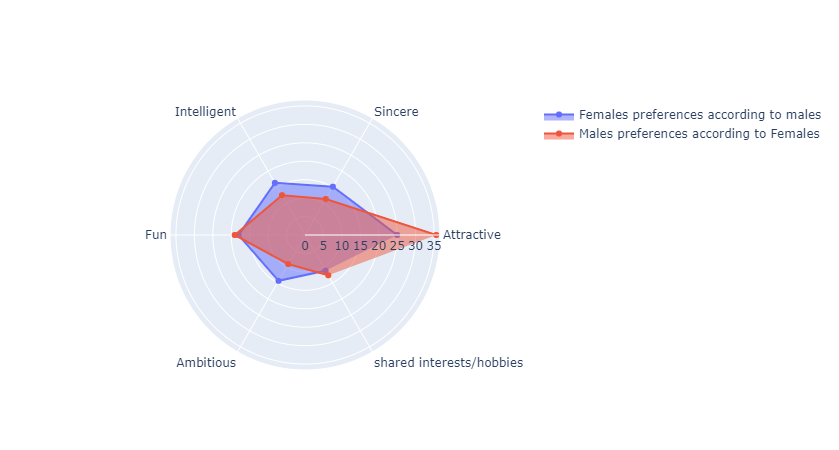

In [74]:
c = ['attr2_1','sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1' ]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[c].mean(),
    theta=theta,
    fill='toself',
    name='Females preferences according to males'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[c].mean(),
    theta=theta,
    fill='toself',
    name='Males preferences according to Females'
))

fig.show()

According to each other, opposite sex believe the other is looking for same criteria than himself

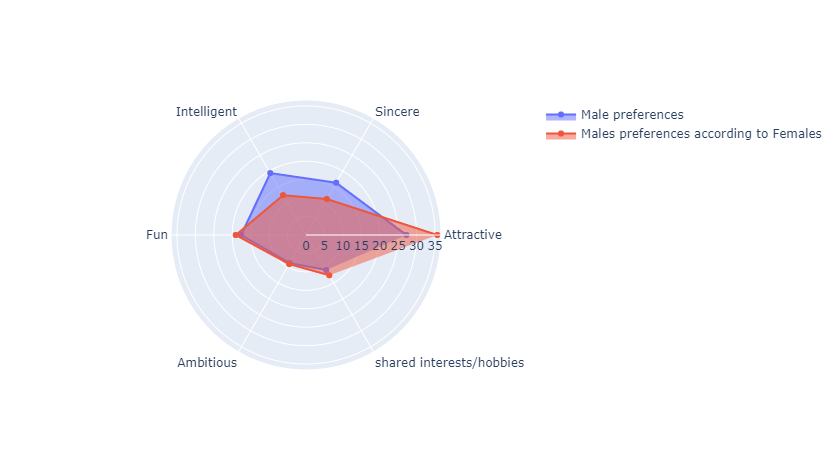

In [207]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[b].mean(),
    theta=theta,
    fill='toself',
    name='Male preferences'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[c].mean(),
    theta=theta,
    fill='toself',
    name='Males preferences according to Females'
))

fig.show()

Men have proven they are not 'just' looking for attractive women

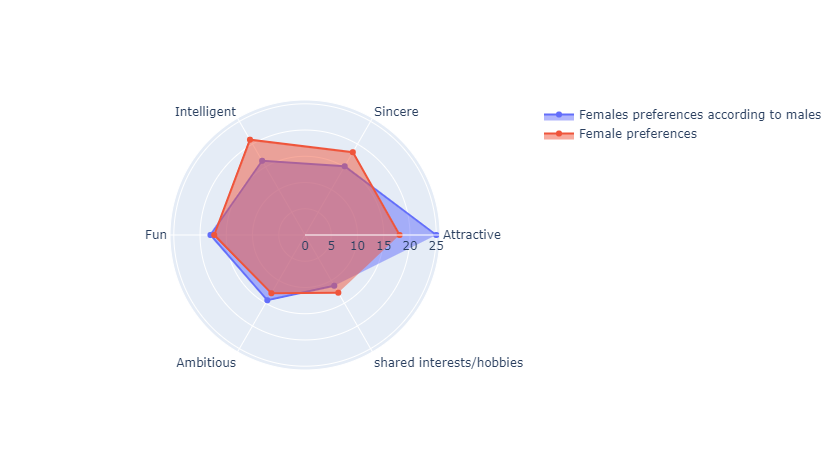

In [208]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=hommes[c].mean(),
    theta=theta,
    fill='toself',
    name='Females preferences according to males'
))

fig.add_trace(go.Scatterpolar(
    r=femmes[b].mean(),
    theta=theta,
    fill='toself',
    name='Female preferences'
))

fig.show()

men might start to unders

In [119]:
corr = df_clean.corr()

In [23]:
corr['match'].sort_values(ascending=False).head(20)

match       1.000000
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
amb         0.140042
amb_o       0.139927
clubbing    0.055435
fun3_1      0.051066
fun1_1      0.041652
pf_o_fun    0.041483
yoga        0.036601
Name: match, dtype: float64